In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Importar el separador de muestras para entretenimiento y pruebas
from sklearn.model_selection import train_test_split
# Importar el clasificador: Arbol de decision
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Importar las metricas para medir la eficiencias del modelo
from sklearn import metrics

In [2]:
ruta = '../data_set/CSV/Mall_Customers-2.csv'
data = pd.read_csv(ruta, index_col=0)
data

Gender  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40
...            ...  ...                 ...                     ...
196         Female   35                 120                      79
197         Female   45                 126                      28
198           Male   32                 126                      74
199           Male   32                 137                      18
200           Male   30                 137                      83

[200 rows x 4 columns]

In [6]:
data.rename({'Gender': 'Genero', 'Age':'Edad', 'Annual Income (k$)':'Ingreso', 'Spending Score (1-100)':'Gasto'}, axis=1, inplace=True)

In [8]:
data['Segmento'] = np.where(data.Ingreso >= 90, 'Ingreso alto', np.where(data.Ingreso < 50, 'Ingreso bajo', 'Ingreso moderado'))

In [9]:
train, test = train_test_split(data, test_size=0.4, stratify=data['Segmento'], random_state=23)

In [10]:
X_train = train[['Edad', 'Ingreso', 'Gasto']]
Y_train = train['Segmento']

# Conjunto de pruebas
X_test = test[['Edad', 'Ingreso', 'Gasto']]
Y_test = test['Segmento']

In [11]:
# Arbol de decision
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
# Ajustar/Entrenar el modelo
mod_dt.fit(X_train, Y_train)
# Predecir resultados sobre el conjunto de pruebas
prediccion = mod_dt.predict(X_test)

In [12]:
# Importancia de cada predictor
mod_dt.feature_importances_

array([0., 1., 0.])

In [13]:
fn = ['Edad', 'Ingreso', 'Gasto']
cn = ['Ingreso alto', 'Ingreso bajo', 'Ingreso moderado']

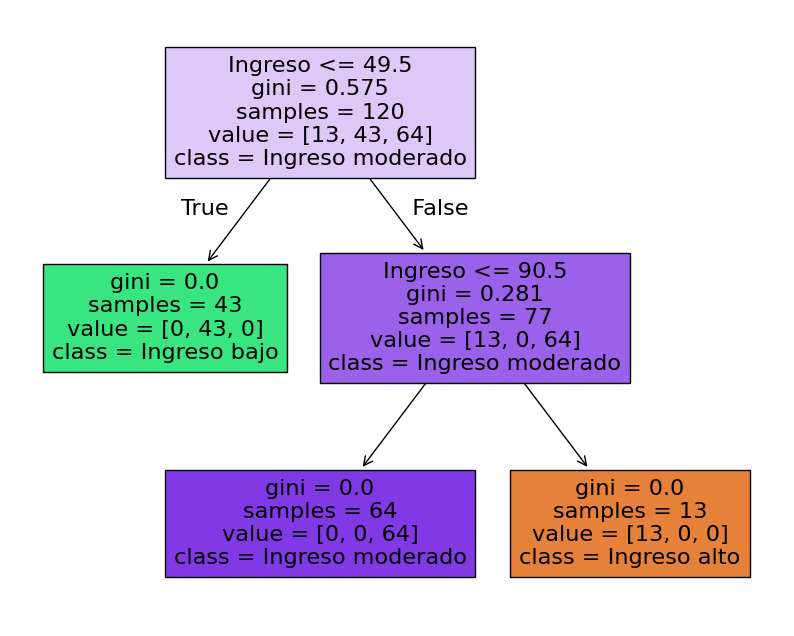

In [14]:
# Visualizar las reglas de clasificacion
plt.figure(figsize=(10,8))
plot_tree(mod_dt, feature_names=fn, class_names=cn, filled=True);